<a href="https://colab.research.google.com/github/jinyoungmoonDEV/Academy_Python_DeepLearning/blob/main/%EB%B9%84%ED%8A%B82205_%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 퍼셉트론

입력층... ->  출력층

In [1]:
from tensorflow import keras

In [2]:
data = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print(type(data))
print(len(data))

<class 'tuple'>
2


In [5]:
train_data,test_data = data
print(type(train_data))
print(len(train_data))
print(type(test_data))
print(len(test_data))

<class 'tuple'>
2
<class 'tuple'>
2


In [6]:
train_input, train_target = train_data
test_input, test_target = test_data
print(train_input.shape)
print(test_input.shape)

(60000, 28, 28)
(10000, 28, 28)


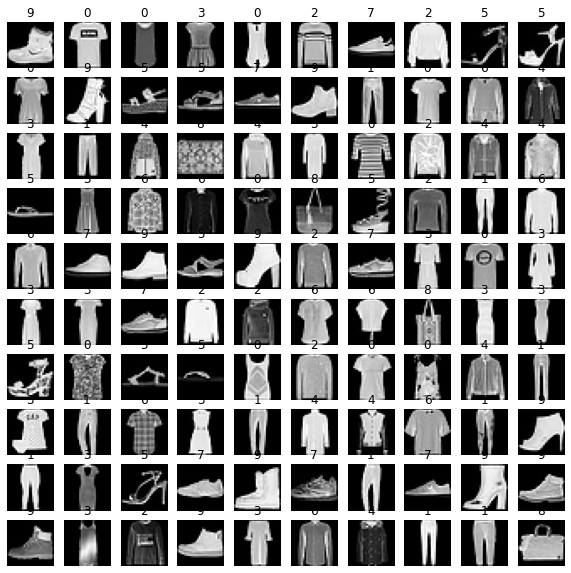

In [7]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(10,10,figsize=(10,10))
for r in range(10):
  for c in range(10):
    axs[r][c].imshow(train_input[r*10+c],cmap='gray')
    axs[r][c].axis('off')
    axs[r][c].set_title(train_target[r*10+c])
plt.show()

In [8]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [9]:
train_scaled = train_input/255.0 #Min-Max 변환 (값-최솟값)/(최댓값-최솟값)
train_scaled = train_scaled.reshape(-1,28*28)
train_scaled.shape

(60000, 784)

In [11]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier()
scores = cross_validate(sc,train_scaled,train_target)
print(np.mean(scores["test_score"]))

0.8360333333333333


# 텐서플로 와 케라스

In [12]:
from tensorflow import keras

In [21]:
from sklearn.model_selection import train_test_split
train_scaled,val_scaled,train_target,val_target =\
  train_test_split(train_scaled,train_target,test_size=0.2)

In [22]:
print(train_scaled.shape,val_scaled.shape)

(36000, 784) (9000, 784)


In [23]:
from sklearn import metrics
dense = keras.layers.Dense(10,activation='softmax',input_shape=(784,))
model = keras.Sequential(dense)
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(train_scaled,train_target,epochs=30)

Epoch 1/30
1125/1125 [==============================] - 3s 2ms/step - loss: 0.6434 - accuracy: 0.7801
Epoch 2/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4879 - accuracy: 0.8353
Epoch 3/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4609 - accuracy: 0.8461
Epoch 4/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4465 - accuracy: 0.8510
Epoch 5/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4377 - accuracy: 0.8548
Epoch 6/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4310 - accuracy: 0.8582
Epoch 7/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4254 - accuracy: 0.8585
Epoch 8/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4211 - accuracy: 0.8605
Epoch 9/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.4157 - accuracy: 0.8612
Epoch 10/30
1125/1125 [==============================] - 2s 2ms/step - loss: 0.414

In [25]:
model.evaluate(val_scaled, val_target)

282/282 [==============================] - 1s 1ms/step - loss: 0.5092 - accuracy: 0.8473


[0.509190022945404, 0.8473333120346069]

# Deep NN

In [28]:
dense1 = keras.layers.Dense(100,activation='sigmoid',input_shape=(784,))
dense2 = keras.layers.Dense(10,activation='softmax')
model = keras.Sequential()
model.add(dense1)
model.add(dense2)
model.compile(loss=keras.losses.sparse_categorical_crossentropy,metrics='accuracy')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(train_scaled,train_target,epochs=30)

Epoch 1/30
1125/1125 [==============================] - 5s 4ms/step - loss: 0.6007 - accuracy: 0.8009
Epoch 2/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.4226 - accuracy: 0.8478
Epoch 3/30
1125/1125 [==============================] - 5s 4ms/step - loss: 0.3864 - accuracy: 0.8613
Epoch 4/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.3625 - accuracy: 0.8689
Epoch 5/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.3449 - accuracy: 0.8746
Epoch 6/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.3310 - accuracy: 0.8806
Epoch 7/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.3195 - accuracy: 0.8845
Epoch 8/30
1125/1125 [==============================] - 3s 3ms/step - loss: 0.3089 - accuracy: 0.8894
Epoch 9/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.3001 - accuracy: 0.8913
Epoch 10/30
1125/1125 [==============================] - 4s 3ms/step - loss: 0.291

In [30]:
model.evaluate(val_scaled, val_target)

282/282 [==============================] - 1s 2ms/step - loss: 0.3578 - accuracy: 0.8813


[0.3578267991542816, 0.8813333511352539]

In [31]:
flat_layer = keras.layers.Flatten(input_shape=(28,28)) #한줄로
dense1 = keras.layers.Dense(100,activation='sigmoid',input_shape=(784,))
dense2 = keras.layers.Dense(10,activation='softmax')
model = keras.Sequential()
model.add(flat_layer)
model.add(dense1)
model.add(dense2)
model.compile(loss=keras.losses.sparse_categorical_crossentropy,metrics='accuracy')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [33]:
(train_input, train_target),(test_input,test_target) =\
  keras.datasets.fashion_mnist.load_data()
print(train_input.shape)

(60000, 28, 28)


In [34]:
train_scaled = train_input/255.0 #min-max변환
test_scaled = test_input/255.0 #min-max변환

In [35]:
train_scaled, val_scaled, train_target, val_target =\
  train_test_split(train_scaled, train_target, test_size=0.2)
print(train_scaled.shape)

(48000, 28, 28)


In [36]:
model.fit(train_scaled,train_target,epochs=30)

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5618 - accuracy: 0.8083
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4056 - accuracy: 0.8529
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3704 - accuracy: 0.8666
Epoch 4/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3481 - accuracy: 0.8748
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3317 - accuracy: 0.8797
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3187 - accuracy: 0.8848
Epoch 7/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3085 - accuracy: 0.8881
Epoch 8/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2971 - accuracy: 0.8918
Epoch 9/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2884 - accuracy: 0.8957
Epoch 10/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.281

In [37]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3443 - accuracy: 0.8892


[0.3443177044391632, 0.8891666531562805]

In [39]:
flat_layer = keras.layers.Flatten(input_shape=(28,28)) #한줄로
dense1 = keras.layers.Dense(100,activation='sigmoid',input_shape=(784,))
dense2 = keras.layers.Dense(10,activation='softmax')
model = keras.Sequential()
model.add(flat_layer)
model.add(dense1)
model.add(dense2)
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics='accuracy')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [41]:
hist = model.fit(train_scaled,train_target,epochs=30)

Epoch 1/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1575 - accuracy: 0.9437
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1556 - accuracy: 0.9446
Epoch 3/30
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1492 - accuracy: 0.9459
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1458 - accuracy: 0.9477
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1437 - accuracy: 0.9487
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1409 - accuracy: 0.9498
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1367 - accuracy: 0.9516
Epoch 8/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1331 - accuracy: 0.9530
Epoch 9/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1320 - accuracy: 0.9534
Epoch 10/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.128

In [43]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy'])


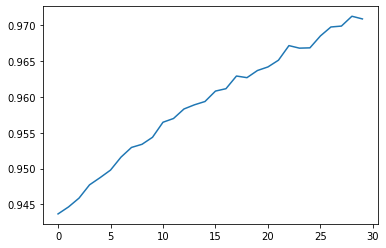

In [44]:
plt.plot(hist.history['accuracy'])
plt.show()

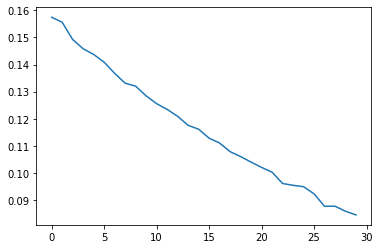

In [45]:
plt.plot(hist.history['loss'])
plt.show()

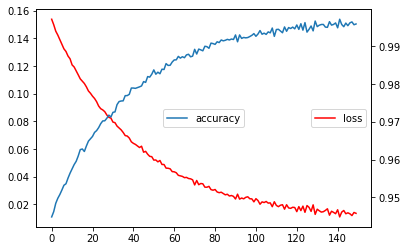

In [56]:
fig, ax1 = plt.subplots()
ax1.plot(hist.history['loss'], label='loss',color='r')
ax1.legend(loc='center right')
ax2 = ax1.twinx()
ax2.plot(hist.history['accuracy'],label='accuracy')
ax2.legend(loc='center')
plt.show()

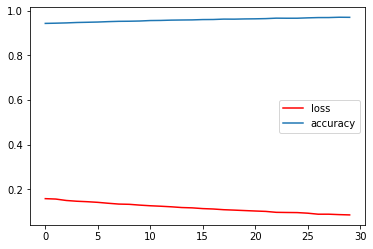

In [48]:
plt.plot(hist.history['loss'], label='loss',color='r')
plt.plot(hist.history['accuracy'],label='accuracy')
plt.legend()
plt.show()

# 검증 넣기

In [49]:
flat_layer = keras.layers.Flatten(input_shape=(28,28)) #한줄로
dense1 = keras.layers.Dense(100,activation='sigmoid',input_shape=(784,))
dense2 = keras.layers.Dense(10,activation='softmax')
model = keras.Sequential()
model.add(flat_layer)
model.add(dense1)
model.add(dense2)
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics='accuracy')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [50]:
hist = model.fit(train_scaled, train_target, epochs=30,validation_data=(val_scaled,val_target))
#hist = model.fit(train_scaled, train_target, epochs=30,validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5797 - accuracy: 0.8040 - val_loss: 0.4386 - val_accuracy: 0.8452
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4057 - accuracy: 0.8543 - val_loss: 0.3911 - val_accuracy: 0.8612
Epoch 3/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3664 - accuracy: 0.8681 - val_loss: 0.3746 - val_accuracy: 0.8654
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3435 - accuracy: 0.8751 - val_loss: 0.3621 - val_accuracy: 0.8692
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3256 - accuracy: 0.8816 - val_loss: 0.3576 - val_accuracy: 0.8697
Epoch 6/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3092 - accuracy: 0.8880 - val_loss: 0.3771 - val_accuracy: 0.8639
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2959 - accuracy: 0.8923 - val_loss: 0.3664 - val_accuracy:

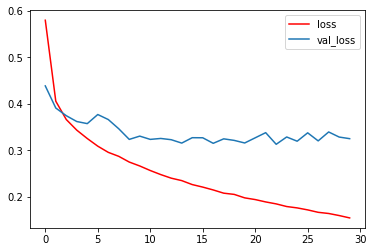

In [54]:
plt.plot(hist.history['loss'], label='loss',color='r')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [55]:
hist = model.fit(train_scaled, train_target, epochs=150,validation_data=(val_scaled,val_target))
#hist = model.fit(train_scaled, train_target, epochs=30,validation_split=0.2)

Epoch 1/150
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1538 - accuracy: 0.9448 - val_loss: 0.3401 - val_accuracy: 0.8877
Epoch 2/150
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1499 - accuracy: 0.9462 - val_loss: 0.3433 - val_accuracy: 0.8854
Epoch 3/150
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1452 - accuracy: 0.9484 - val_loss: 0.3373 - val_accuracy: 0.8887
Epoch 4/150
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1424 - accuracy: 0.9497 - val_loss: 0.3386 - val_accuracy: 0.8902
Epoch 5/150
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1391 - accuracy: 0.9507 - val_loss: 0.3494 - val_accuracy: 0.8867
Epoch 6/150
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1359 - accuracy: 0.9519 - val_loss: 0.3477 - val_accuracy: 0.8878
Epoch 7/150
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1324 - accuracy: 0.9532 - val_loss: 0.3451 - val_ac

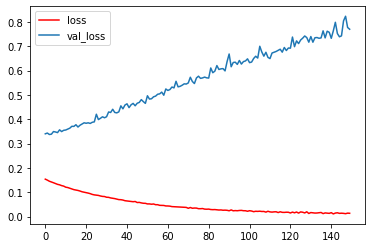

In [57]:
plt.plot(hist.history['loss'], label='loss',color='r')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [58]:
flat_layer = keras.layers.Flatten(input_shape=(28,28)) #한줄로
dense1 = keras.layers.Dense(100,activation='sigmoid')
dense2 = keras.layers.Dense(10,activation='softmax')
model = keras.Sequential()
model.add(flat_layer)
model.add(dense1)
model.add(keras.layers.Dropout(0.5))
model.add(dense2)
model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy,metrics='accuracy')
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [59]:
hist = model.fit(train_scaled, train_target, epochs=150,validation_data=(val_scaled,val_target))
#hist = model.fit(train_scaled, train_target, epochs=30,validation_split=0.2)

Epoch 1/150
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7385 - accuracy: 0.7446 - val_loss: 0.4884 - val_accuracy: 0.8261
Epoch 2/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5146 - accuracy: 0.8156 - val_loss: 0.4317 - val_accuracy: 0.8434
Epoch 3/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4694 - accuracy: 0.8329 - val_loss: 0.4083 - val_accuracy: 0.8508
Epoch 4/150
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4397 - accuracy: 0.8421 - val_loss: 0.4067 - val_accuracy: 0.8482
Epoch 5/150
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4258 - accuracy: 0.8478 - val_loss: 0.3859 - val_accuracy: 0.8593
Epoch 6/150
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4139 - accuracy: 0.8503 - val_loss: 0.3795 - val_accuracy: 0.8600
Epoch 7/150
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4041 - accuracy: 0.8543 - val_loss: 0.3685 - val_ac

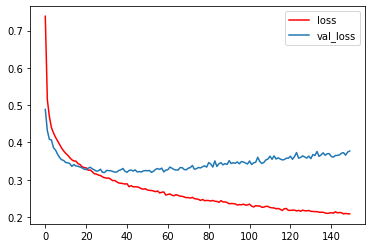

In [60]:
plt.plot(hist.history['loss'], label='loss',color='r')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()
plt.show()